<a href="https://colab.research.google.com/github/nugi1209/Accenture_Data_Analytics_Virtual_Experience/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("https://github.com/nugi1209/Accenture_Data_Analytics_Virtual_Experience/blob/main/Task1RevisedCsv.csv?raw=true", delimiter = ";")
df.head()

,content_id,reaction_type,datetime,sentiment,score,content_user_id,category,content_type
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09:43,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/06/2021 12:22,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/04/2021 05:13,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,02/11/2020 06:28,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo


Questions to ask:
- Overall reaction
- Overall sentiment
- Overall score
- How many reactions on each category
- Sum or average of category's contents


In [24]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [25]:
df['date'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['time'] = df['datetime'].dt.time
df.head()

,content_id,reaction_type,datetime,sentiment,score,content_user_id,category,content_type,date,month,year,time
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-07-11 09:43:00,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo,2020-07-11,7,2020,09:43:00
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-06-01 19:13:00,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo,2021-06-01,6,2021,19:13:00
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo,2021-06-17,6,2021,12:22:00
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo,2021-04-18,4,2021,05:13:00
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2020-02-11 06:28:00,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo,2020-02-11,2,2020,06:28:00


In [59]:
df.to_csv('accenture.csv', index = False)

In [26]:
df['month'] = df['month'].astype('datetime64[M]')
df['year'] = pd.to_datetime(df['year'], format = '%Y')
df.dtypes

content_id                 object
reaction_type              object
datetime           datetime64[ns]
sentiment                  object
score                       int64
content_user_id            object
category                   object
content_type               object
date                       object
month              datetime64[ns]
year               datetime64[ns]
time                       object
dtype: object

In [27]:
df["category"] = df["category"].str.replace('\"', '')
df["category"].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

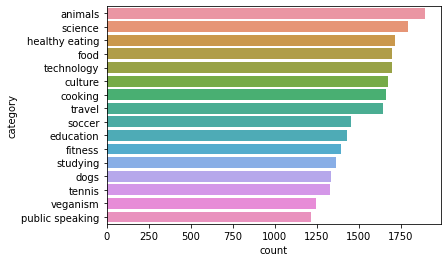

In [28]:

sns.countplot(data = df, y = df["category"],
             order = df['category'].value_counts().index)

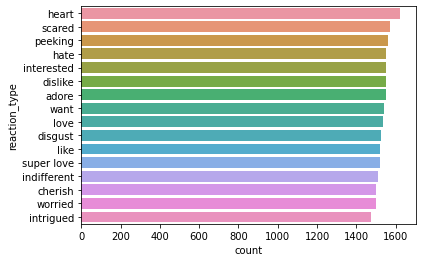

In [29]:

sns.countplot(data = df, y = df["reaction_type"],
             order = df['reaction_type'].value_counts().index)

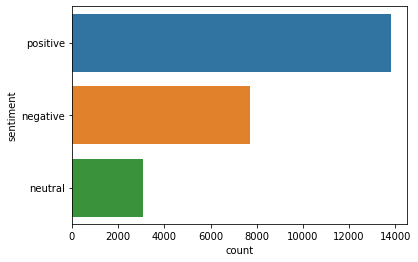

In [30]:

sns.countplot(data = df, y = df["sentiment"],
             order = df['sentiment'].value_counts().index)

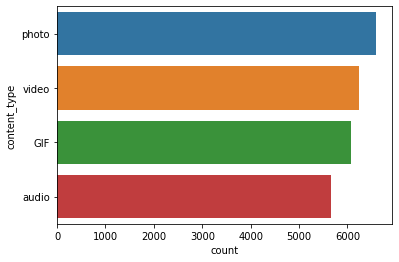

In [31]:
sns.countplot(data = df, y = df["content_type"],
             order = df['content_type'].value_counts().index)

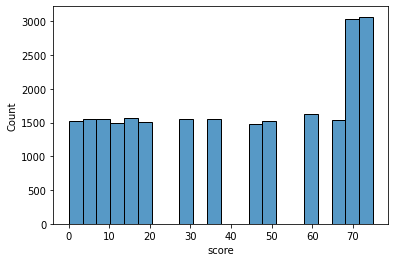

In [32]:
sns.histplot(data = df, x = df['score'])

In [33]:
df['score'].unique()

array([ 0, 10, 15,  5, 30, 20, 35, 65, 70, 75, 45, 12, 50, 60, 72])

In [34]:
df_category_score_sum = df.groupby(by = 'category', as_index= False)['score'].sum()
df_category_score_sum.head()

,category,score
0,animals,74965
1,cooking,64756
2,culture,66579
3,dogs,52511
4,education,57436


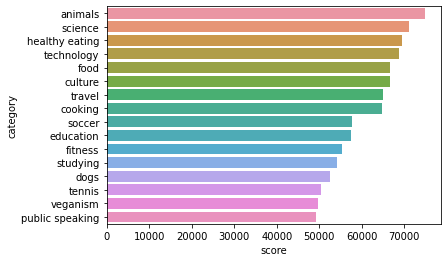

In [35]:
sns.barplot(data = df_category_score_sum, y = 'category', x = 'score',
            order = df_category_score_sum.sort_values('score', ascending = False).category)

# order = df['content_type'].value_counts().index

In [48]:
df_category_date_sum = df.groupby(by = ['category', 'date'], as_index= False)['content_id'].count()
df_category_date_sum.head()

,category,date,content_id
0,animals,2020-01-07,2
1,animals,2020-01-08,8
2,animals,2020-01-09,6
3,animals,2020-01-10,7
4,animals,2020-01-11,7


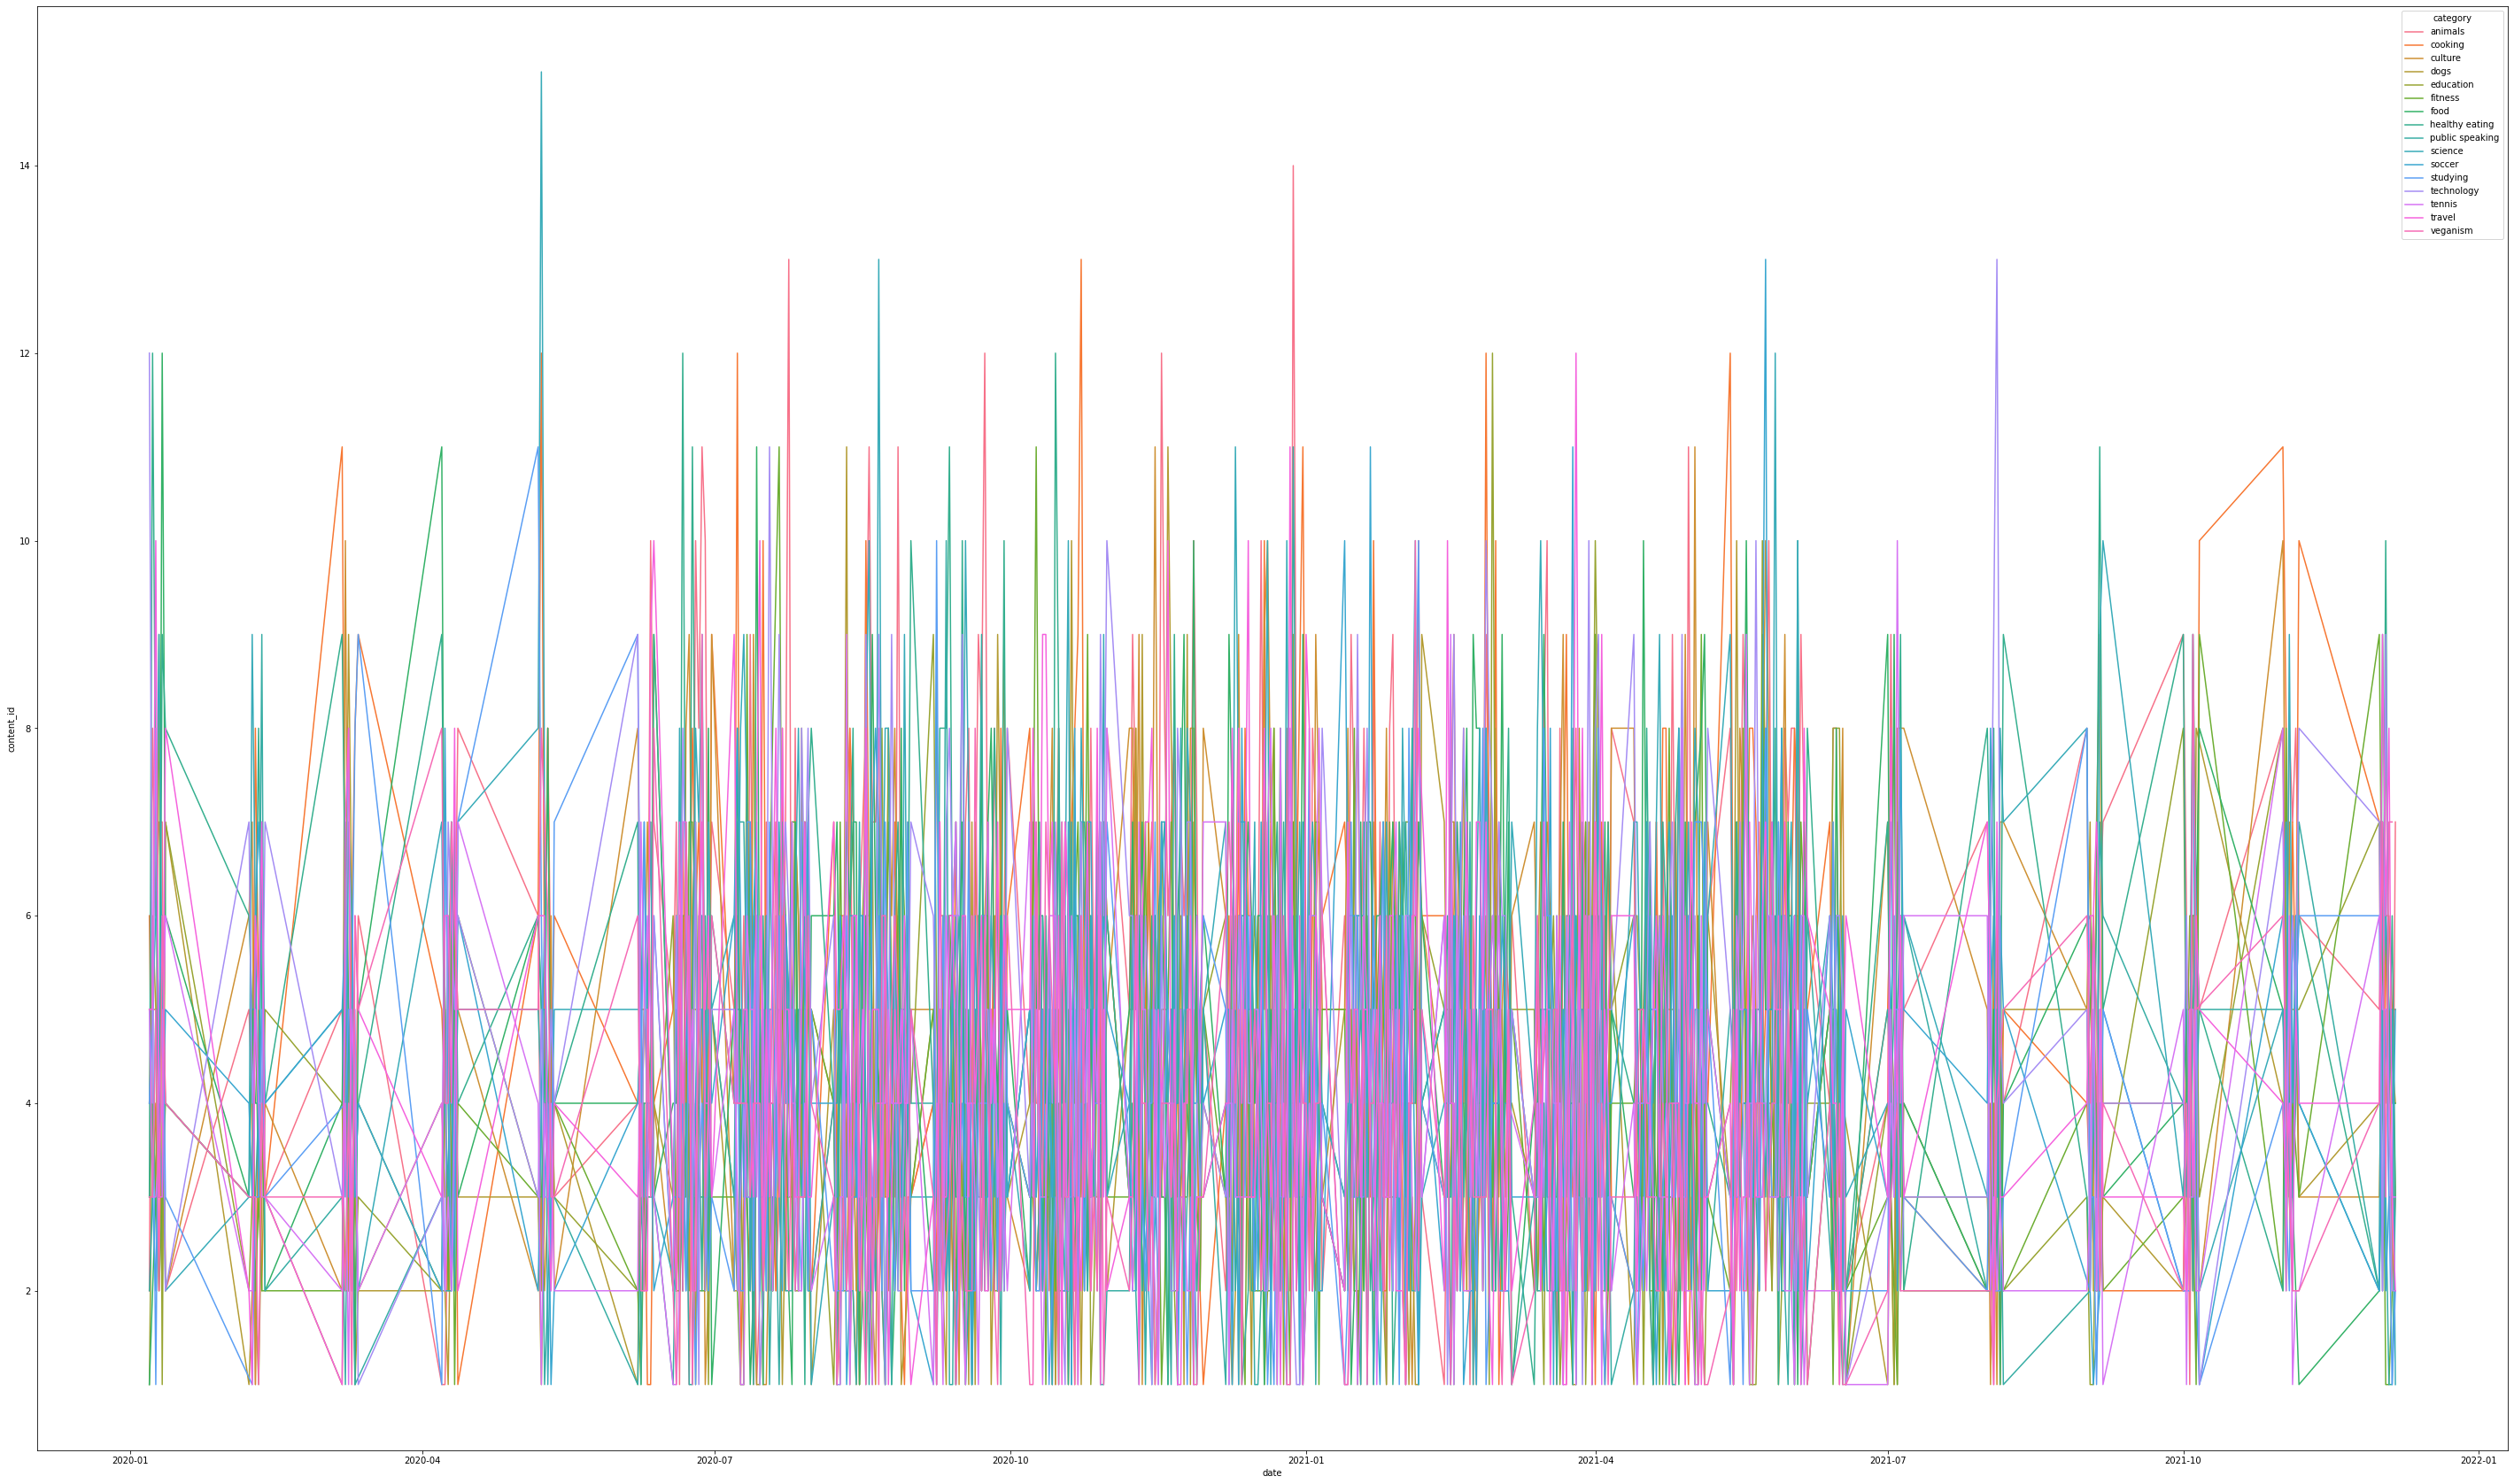

In [51]:
plt.figure(figsize=(50,30))
sns.lineplot(data = df_category_date_sum, x = 'date', y = 'content_id', hue = 'category')

In [37]:
df_category_score_mean = df.groupby(by = 'category', as_index= False)['score'].mean()
df_category_score_mean.head()

,category,score
0,animals,39.517659
1,cooking,38.915865
2,culture,39.724940
3,dogs,39.245889
4,education,40.080949


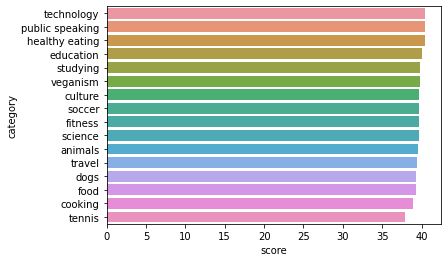

In [38]:
sns.barplot(data = df_category_score_mean, y = 'category', x = 'score', order = df_category_score_mean.sort_values('score', ascending = False).category)

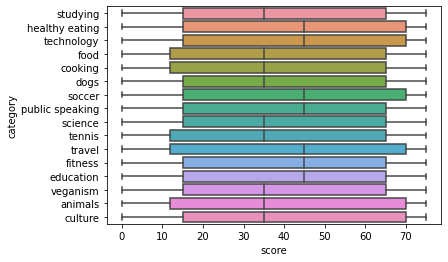

In [39]:
sns.boxplot(data = df, y = 'category', x = 'score')

In [40]:
df_content_score = df.groupby(by = 'content_id', as_index= False).sum()
df_content_score.head()

,content_id,score
0,004e820e-49c3-4ba2-9d02-62db0065410c,60
1,00d0cdf9-5919-4102-bf84-ebde253c3cd2,2013
2,01396602-c759-4a17-90f0-8f9b3ca11b30,1303
3,019b61f4-926c-438e-adaf-6119c5eab752,454
4,01ab84dd-6364-4236-abbb-3f237db77180,15


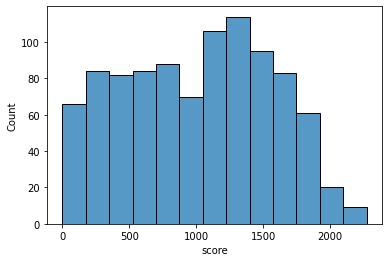

In [41]:
sns.histplot(data = df_content_score, x = df_content_score['score'])

In [42]:
df_content_category = df.groupby(by = ['content_id', 'sentiment'], as_index= False)['score'].sum()
df_content_category.head()

,content_id,sentiment,score
0,004e820e-49c3-4ba2-9d02-62db0065410c,positive,60
1,00d0cdf9-5919-4102-bf84-ebde253c3cd2,negative,130
2,00d0cdf9-5919-4102-bf84-ebde253c3cd2,neutral,110
3,00d0cdf9-5919-4102-bf84-ebde253c3cd2,positive,1773
4,01396602-c759-4a17-90f0-8f9b3ca11b30,negative,101


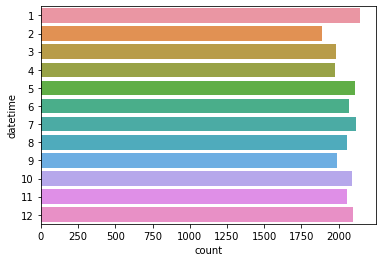

In [43]:
sns.countplot(data = df, y = df['datetime'].dt.month)


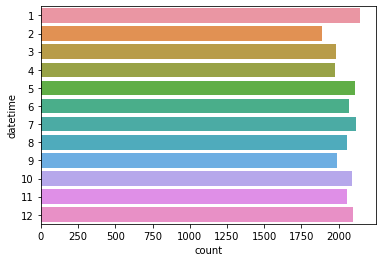

In [44]:
sns.countplot(data = df, y = df['datetime'].dt.month)

In [55]:
df_content_date = df.groupby(by = ['date'], as_index= False)['content_id'].count()
df_content_date.head()

,date,content_id
0,2020-01-07,60
1,2020-01-08,75
2,2020-01-09,76
3,2020-01-10,66
4,2020-01-11,83


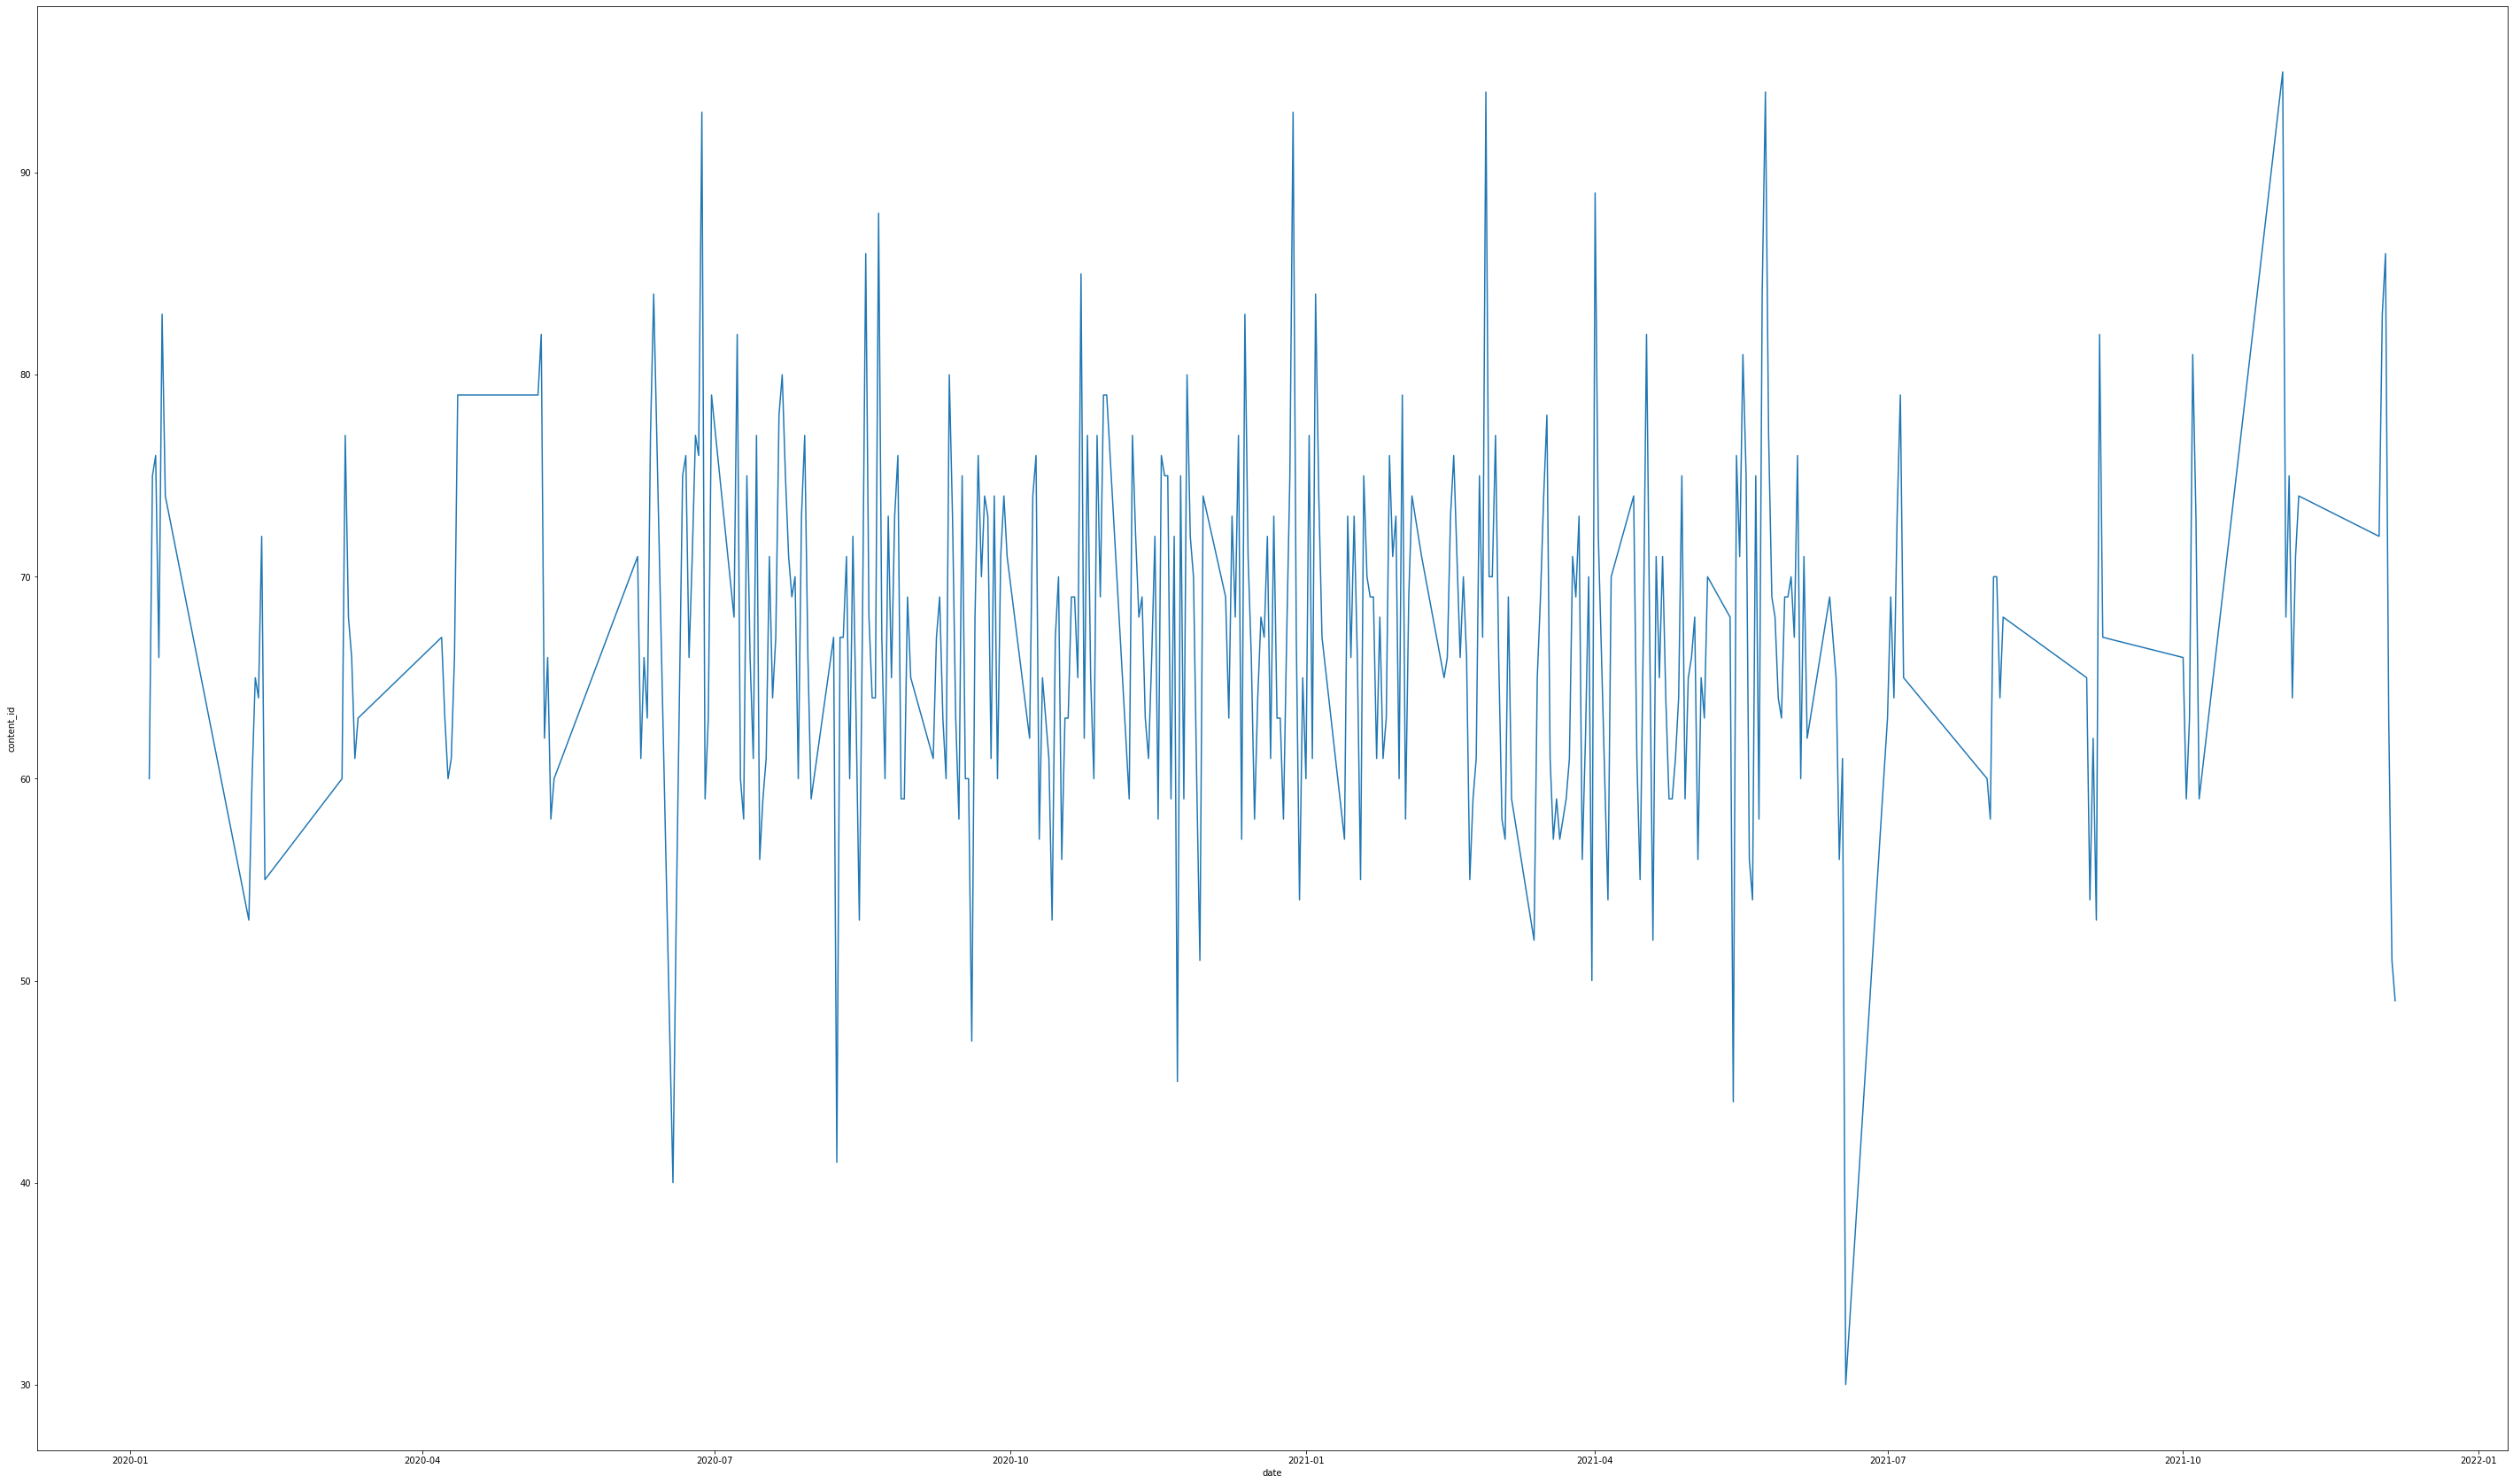

In [58]:
plt.figure(figsize=(50,30))
sns.lineplot(data = df_content_date, x = 'date', y = 'content_id')